In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , cross_val_score ,KFold
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import datetime
import sklearn.preprocessing


#Reading Data

In [3]:
Car = pd.read_csv("car_price_prediction.csv")

In [4]:
df = Car.copy()

In [5]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [7]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [8]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [9]:
df.duplicated().sum()

313

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

#Data analysis & Preprocessing

In [12]:
df=df.drop(['ID','Doors','Color'],axis=1)

In [13]:
# Replacing '-' with 0
df['Levy']=df['Levy'].replace('-','0')

# Converting Levy type to float
df['Levy'] = df['Levy'].astype('float64')

In [14]:
df['Age'] = datetime.datetime.now().year - df['Prod. year']


In [15]:
df = df.drop('Prod. year',axis=1)


In [19]:
df['Mileage'] =df['Mileage'].str.replace('km',"")

# Converting Mileage type to int64
df.Mileage = df.Mileage.astype('Int64')

In [17]:
# Replacing 'Turbo' with ''
df['Engine volume'] = df['Engine volume'].str.replace('Turbo','')

# Converting Levy type to float
df['Engine volume'] = df['Engine volume'].astype('float64')

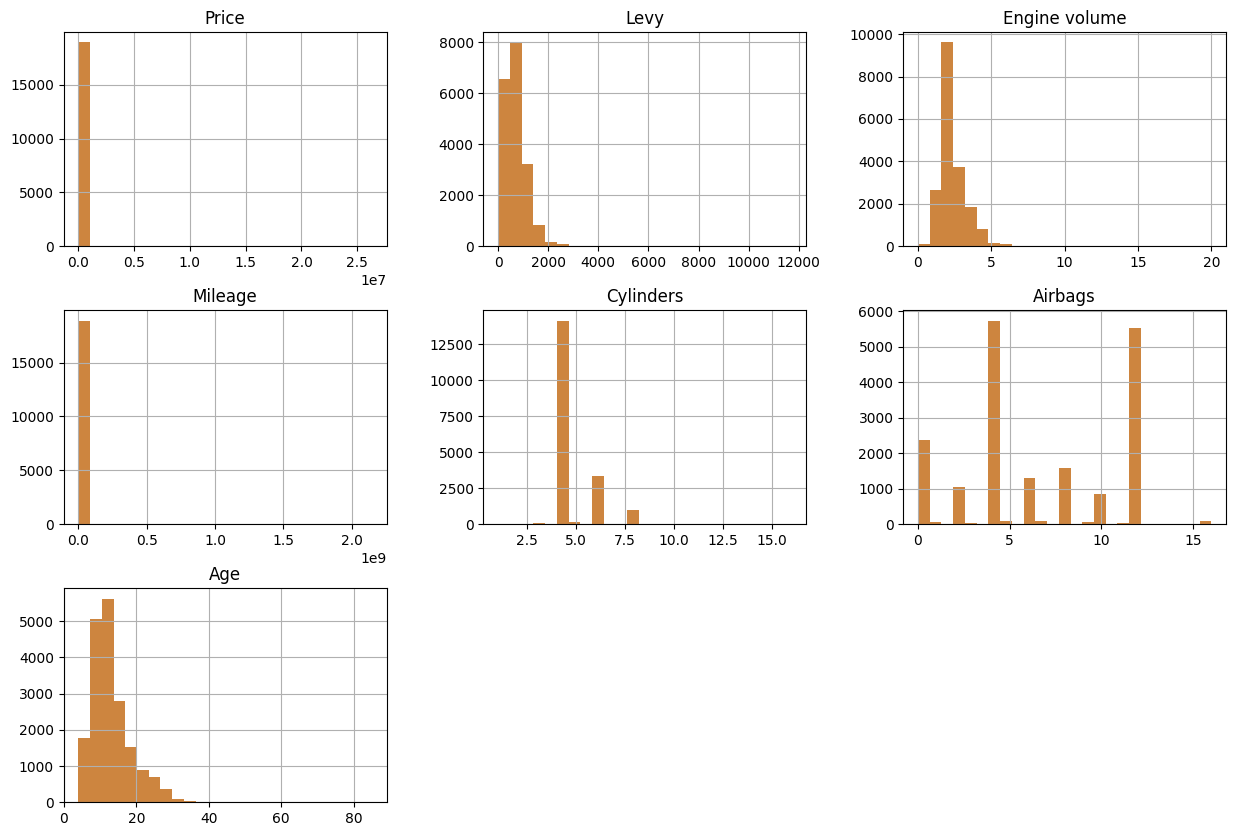

In [20]:
df.hist(bins=25,figsize=(15,10),color='peru')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

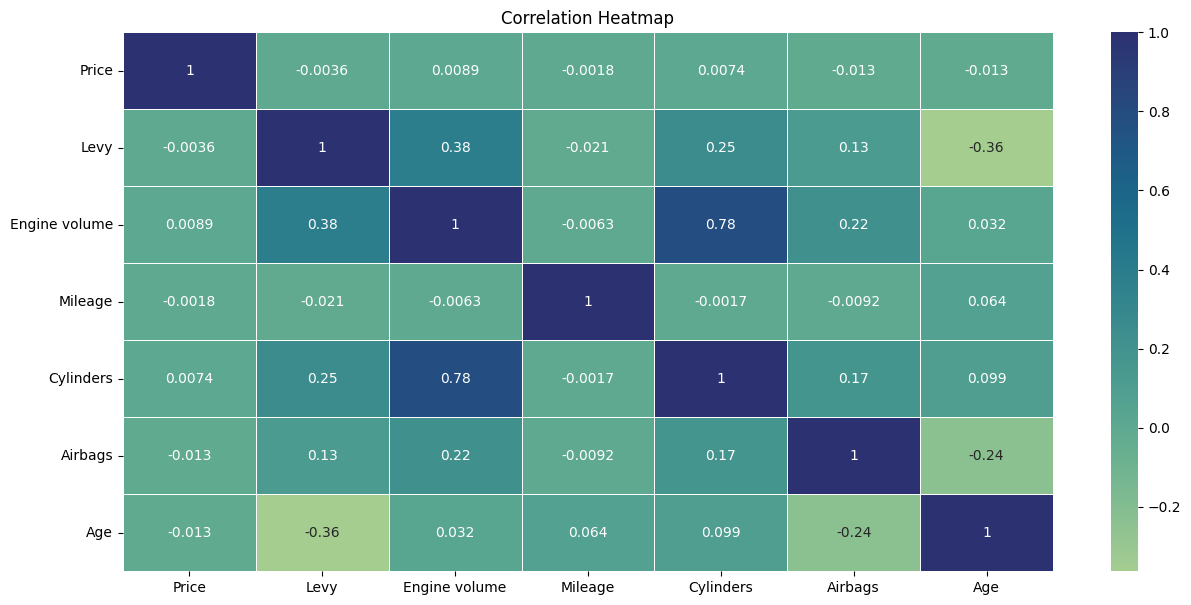

In [21]:
cor= df.select_dtypes(exclude=object).corr()
plt.figure(figsize=(15,7))
sns.heatmap(cor, annot= True, linewidths= 0.5,cmap='crest')
plt.title('Correlation Heatmap')


<ipython-input-24-5faa335065ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x='Category',palette='hot')


<Axes: xlabel='Category', ylabel='count'>

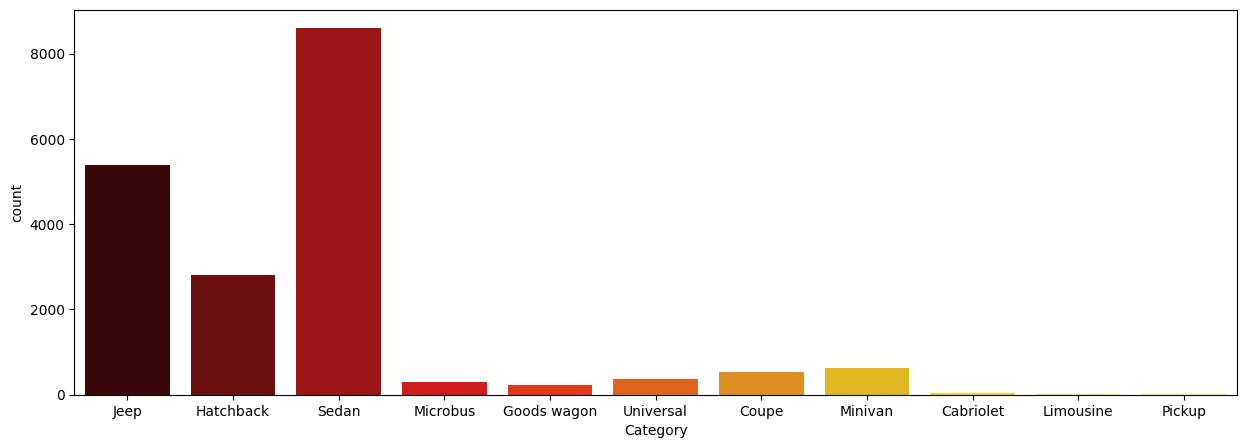

In [24]:
plt.subplots(figsize=(15,5))
sns.countplot(data= df, x='Category',palette='hot')

<ipython-input-28-f3bf26ab06c7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='hot')
<ipython-input-28-f3bf26ab06c7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='hot')
<ipython-input-28-f3bf26ab06c7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='hot')
<ipython-input-28-f3bf26ab06c7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same ef

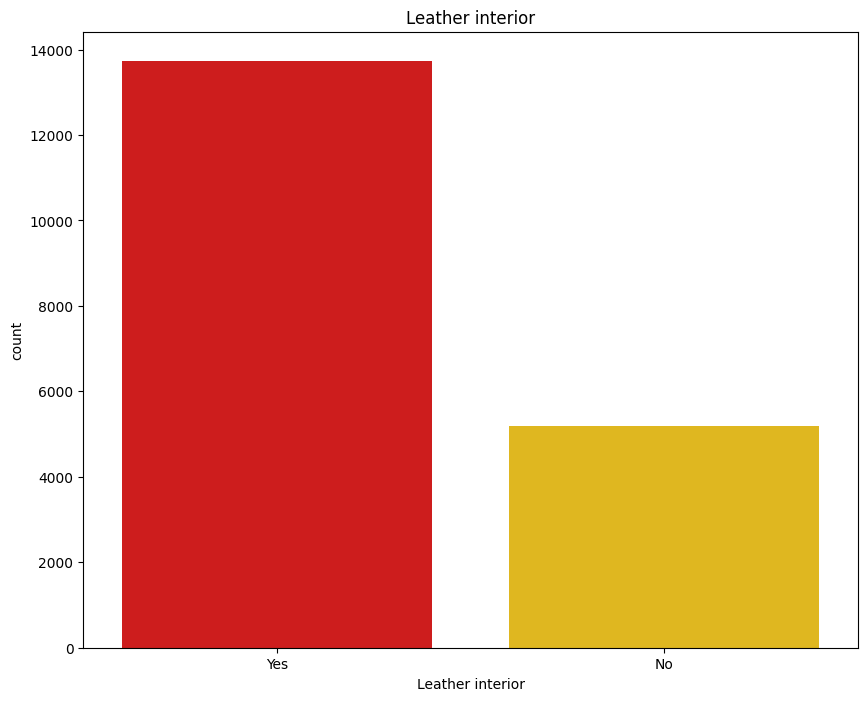

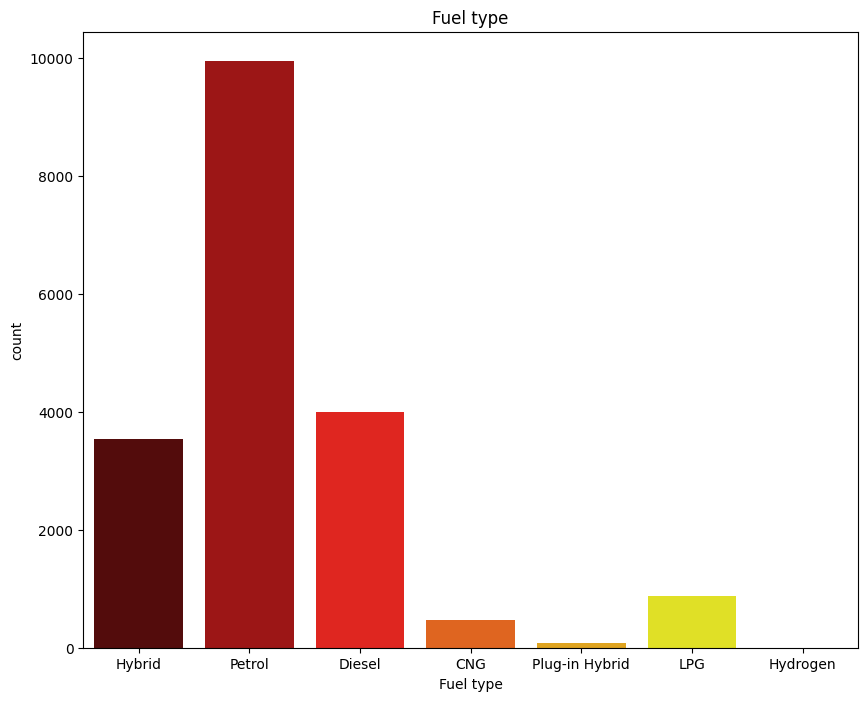

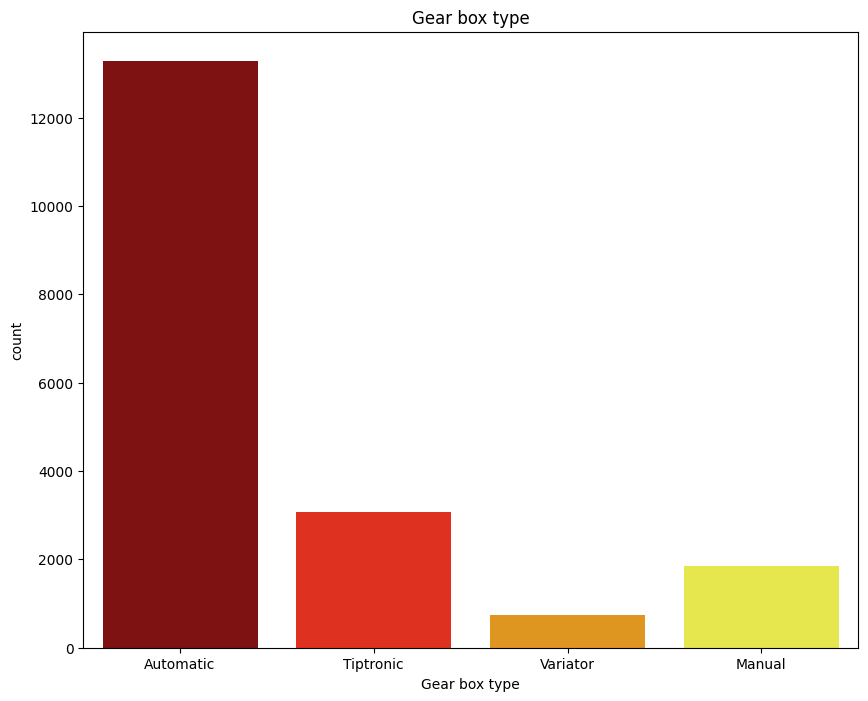

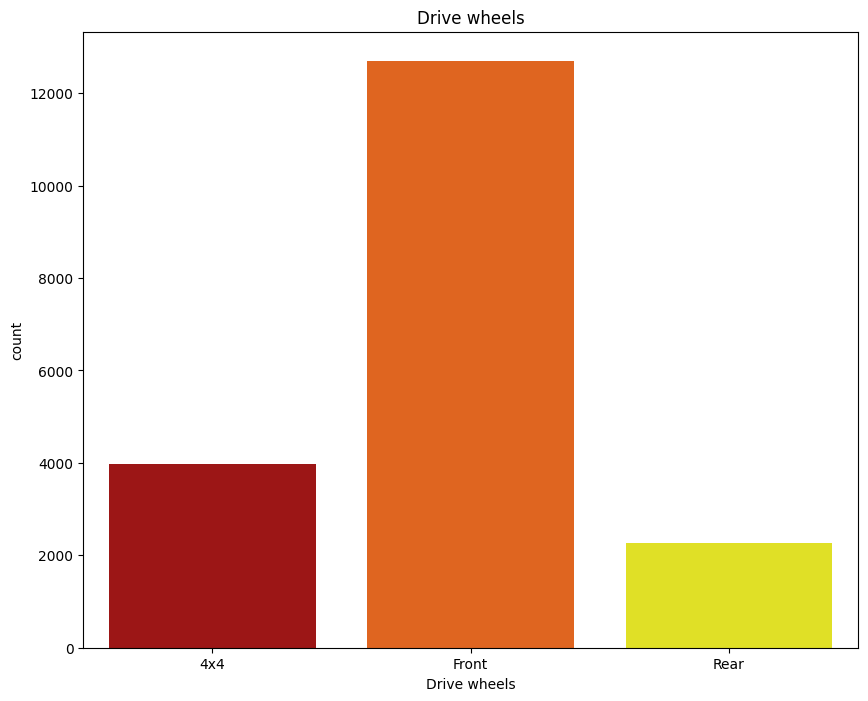

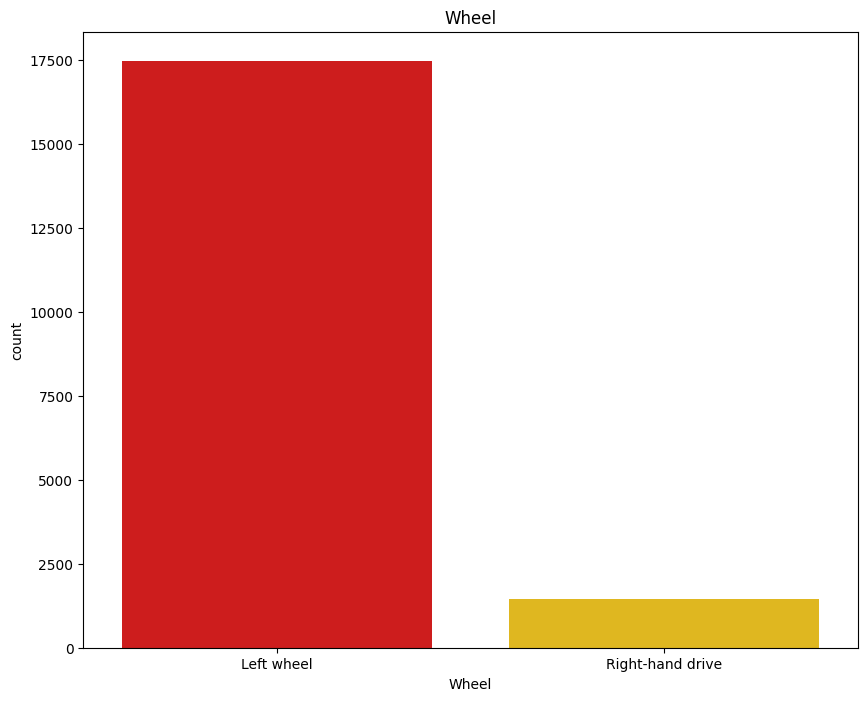

In [28]:
columns =['Leather interior','Fuel type','Gear box type','Drive wheels','Wheel']
for col in columns:
    plt.figure(figsize=(10,8))
    #top10 = data[col].value_counts()[:10]
    sns.countplot(data=df,x=col,palette='hot')
    plt.title(col)

<ipython-input-31-61e9cd2cba87>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cars, y=top_10_cars.index,palette='hot',linewidth = 4)


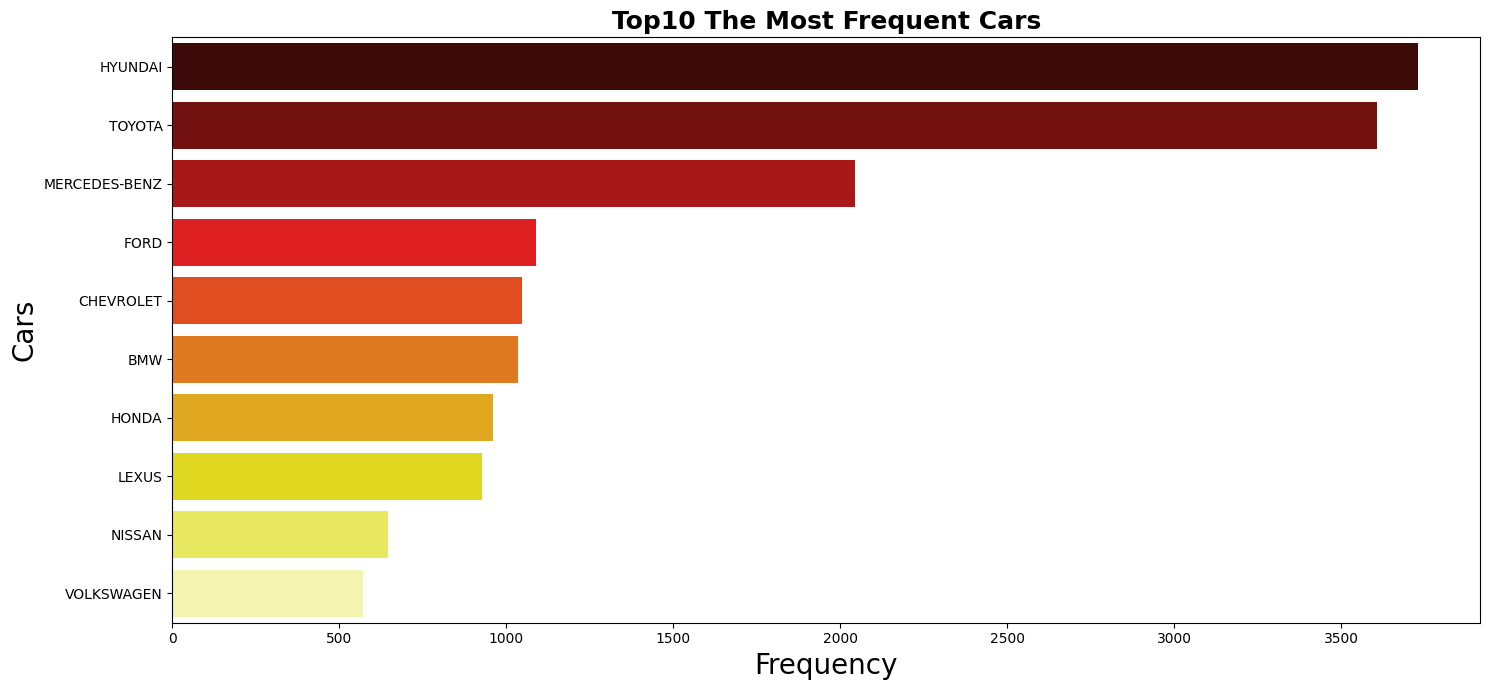

In [31]:
top_10_cars = df.Manufacturer.value_counts().sort_values(ascending=False)[:10]
plt.figure(figsize=(15, 7))
sns.barplot(x=top_10_cars, y=top_10_cars.index,palette='hot',linewidth = 4)
plt.title('Top10 The Most Frequent Cars',loc='center',fontweight='bold',fontsize=18)
plt.xlabel('Frequency',fontsize=20)
plt.ylabel('Cars',fontsize=20)
plt.tight_layout()

In [34]:
# Calculate average price for top 10 cars
top_10_cars_means_prices = [df[df['Manufacturer']==i]['Price'].mean() for i in list(top_10_cars.index)]

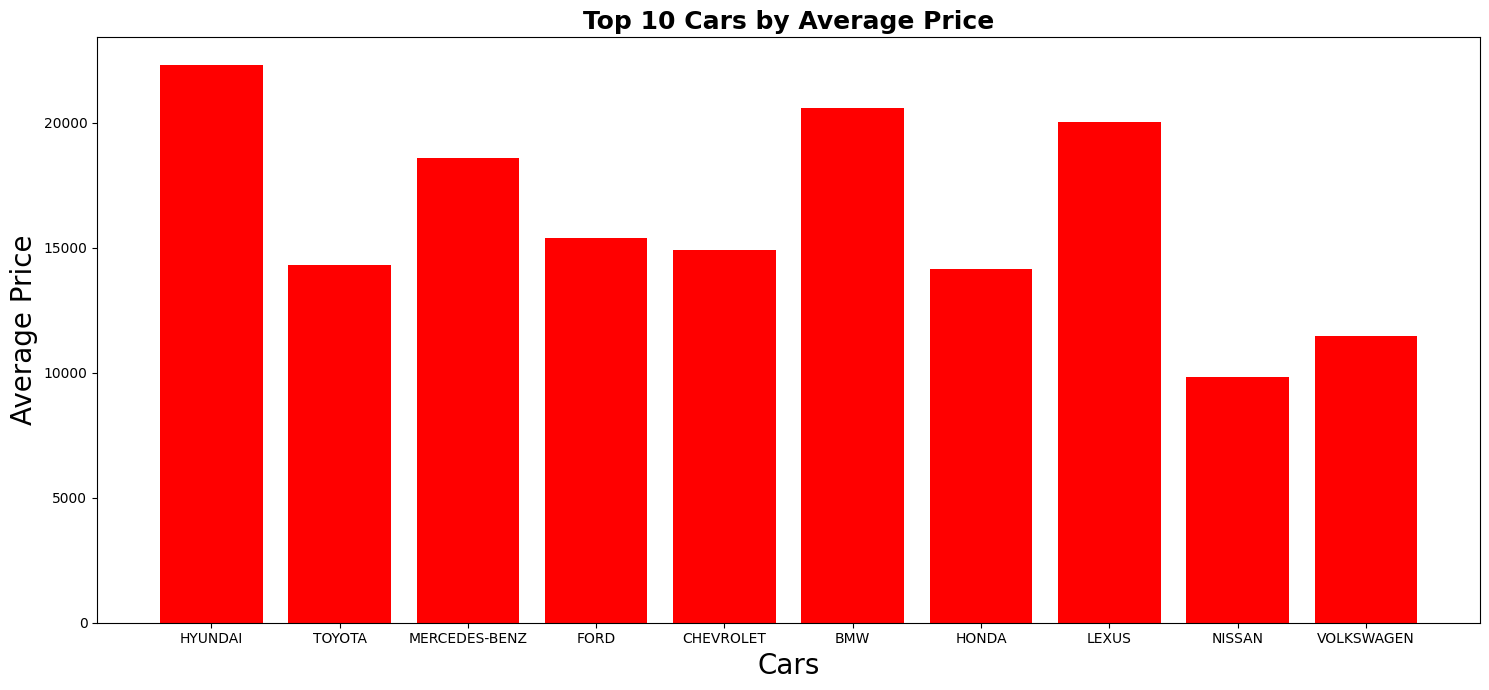

In [40]:
plt.figure(figsize=(15,7))
plt.bar(top_10_cars.index,top_10_cars_means_prices,color='r',linewidth = 4)
plt.title('Top 10 Cars by Average Price',loc='center',fontweight='bold',fontsize=18)
plt.ylabel('Average Price',fontsize=20)
plt.xlabel('Cars',fontsize=20)
plt.tight_layout()
plt.show()

In [41]:
#Detect OutLier
numeric_data = df.select_dtypes(exclude=object)

In [43]:
for col in numeric_data:
    q1 = df[col].quantile(0.75)
    q2 = df[col].quantile(0.25)
    iq = q1 - q2

    low = q2-1.5*iq
    high = q1-1.5*iq
    outlier = ((numeric_data[col]>high) | (numeric_data[col]<low)).sum()

    total = numeric_data[col].shape[0]
    print(f"Total Outliers in {col} are :{outlier}---{round(100*(outlier)/total,2)}%")

Total Outliers in Price are :18924---100.0%
Total Outliers in Levy are :18924---100.0%
Total Outliers in Engine volume are :17625---93.14%
Total Outliers in Mileage are :17703---93.55%
Total Outliers in Cylinders are :4765---25.18%
Total Outliers in Airbags are :16540---87.4%
Total Outliers in Age are :18082---95.55%


In [44]:
if outlier>0:
    df = df.loc[(df[col]<=high) & (df[col]>=low) ]

In [45]:
#convert object
objectdata = df.select_dtypes(include=object)
numdata = df.select_dtypes(exclude=object)

In [48]:

for i in range(0, objectdata.shape[1]):
    if objectdata.dtypes[i] == 'object':
        objectdata.iloc[:, i] = sklearn.preprocessing.LabelEncoder().fit_transform(objectdata.iloc[:, i])

<ipython-input-48-571f111440bb>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  objectdata.iloc[:, i] = sklearn.preprocessing.LabelEncoder().fit_transform(objectdata.iloc[:, i])
<ipython-input-48-571f111440bb>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  objectdata.iloc[:, i] = sklearn.preprocessing.LabelEncoder().fit_transform(objectdata.iloc[:, i])
<ipython-input-48-571f111440bb>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retai

In [49]:
df = pd.concat([objectdata,numdata],axis=1)

#Helpers

In [52]:
def pred_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print("MAE For Train: ", metrics.mean_absolute_error(y_train, y_pred_train))
    print("MAE For Test: ", metrics.mean_absolute_error(y_test, y_pred_test))

    print("R2 Score For Train: ", r2_score(y_train, y_pred_train))
    print("R2 Score For Test: ", r2_score(y_test, y_pred_test))

In [53]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Model Training and Testing


In [51]:
X=df.drop(columns=['Price'])
y = df['Price']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
X_train.shape

(673, 14)

In [56]:
X_test.shape

(169, 14)

# Model with train_test

## Random Forest Model


In [57]:
rf = RandomForestRegressor()
pred_model(rf, X_train, y_train, X_test, y_test)

MAE For Train:  4930.557533774381
MAE For Test:  12168.077580163426
R2 Score For Train:  0.9301772138021905
R2 Score For Test:  0.2614742131186881


##tree

In [58]:
clf = tree.DecisionTreeRegressor(max_depth=3)
pred_model(clf, X_train, y_train, X_test, y_test)

MAE For Train:  21134.028490855177
MAE For Test:  22922.57920324237
R2 Score For Train:  0.6670369115463697
R2 Score For Test:  0.04838292950079803


#Model with cross validation

## Random Forest Model


In [64]:
rf = RandomForestRegressor()

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

mae_scores = -1*cross_val_score(rf, X, y, cv=kf, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(rf, X, y, cv=kf, scoring='r2')

# Print the average MAE and R2 score across all folds
print("Average MAE: {:.2f}".format(mae_scores.mean()))
print("Average R2 Score: {:.2f}".format(r2_scores.mean()))

Average MAE: 13636.89
Average R2 Score: 0.35


##DecisionTreeRegressor

In [65]:
clf = tree.DecisionTreeRegressor(max_depth=3)
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

mae_scores = -1*cross_val_score(clf, X, y, cv=kf, scoring='neg_mean_absolute_error')
r2_scores = cross_val_score(clf, X, y, cv=kf, scoring='r2')

# Print the average MAE and R2 score across all folds
print("Average MAE: {:.2f}".format(mae_scores.mean()))
print("Average R2 Score: {:.2f}".format(r2_scores.mean()))

Average MAE: 21736.80
Average R2 Score: -0.03


#conclusion

 car is a four-wheeled vehicle that runs on an engine and motor. Individuals or families use cars to travel for happy occasions, business purposes, and emergencies. Cars can be of varied sizes, shapes, and colours. A small car can accommodate up to five people.
From models scores we can see that we need more data to predict the price